# Create a Gantt Chart
This small notebook shows how to use the Rantt class for creating a Gantt Chart. 

In [1]:
# These two lines are necessary if Rantt is not installed
# i.e. for navigating to the rantt.py file
import sys
sys.path.append("../")

import rantt

In [2]:
# Load the csv File
inp = rantt.Gantt_chart('../activities.csv')

In [3]:
# Present the table form or the Gantt Chart
inp.showCSV()

,workstream,activity,start date,end date,milestone,deliverable,dependency
0,WP1,Draft Proposal,2019-01-15,2019-03-01,2019-03-01,NaN,NaN
1,WP1,Proofread,2019-02-15,2019-02-22,NaN,NaN,Draft Proposal
2,WP2,Design data model,2019-03-01,2019-03-15,2019-03-15,2019-03-15,NaN
3,WP2,Set up data base,2019-03-15,2019-05-01,NaN,NaN,Design data model
4,WP2,Implement data model,2019-04-01,2019-05-01,2019-05-01,NaN,Set up data base


In [4]:
inp.addDependencies()

1       Draft Proposal
3    Design data model
4     Set up data base
Name: dependency, dtype: object [5 3 2]
0       Draft Proposal
2    Design data model
3     Set up data base
Name: activity, dtype: object [6 4 3]


1       Draft Proposal
3    Design data model
4     Set up data base
Name: dependency, dtype: object [5 3 2]
0       Draft Proposal
2    Design data model
3     Set up data base
Name: activity, dtype: object [6 4 3]


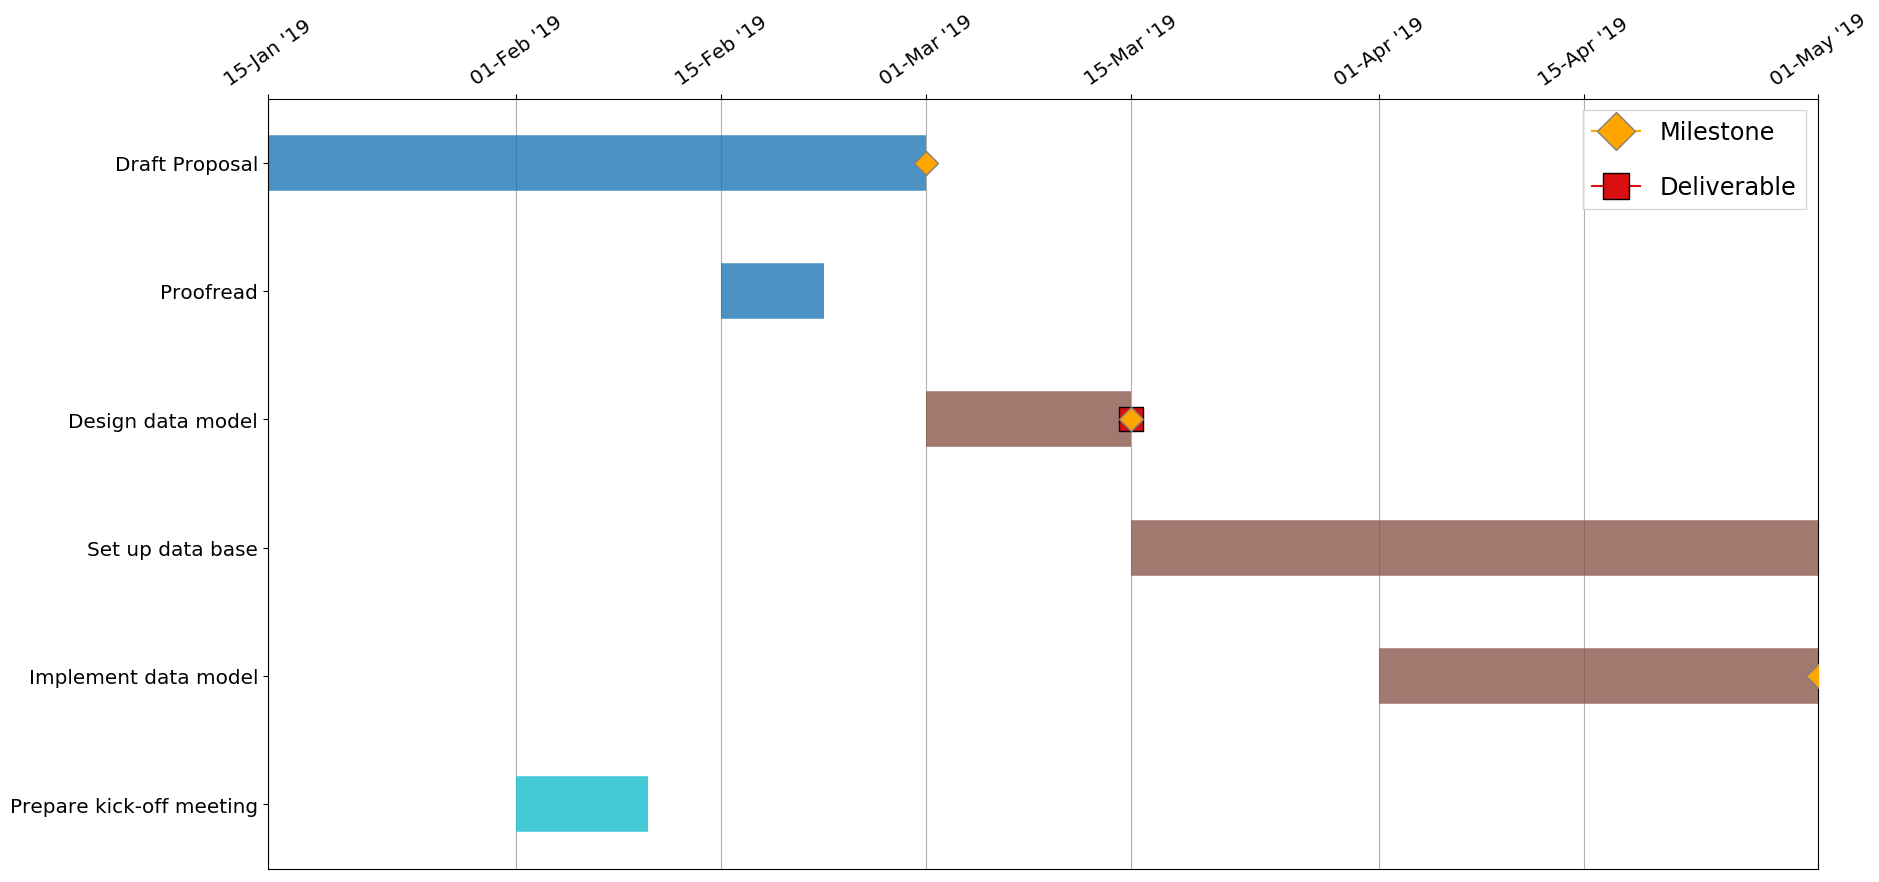

In [4]:
%matplotlib inline
# Plot the Gantt Chart
inp.preparePlot()
#inp.save('../imgs/gantt_chart.png')

------------------------------------------------

In [5]:
import pandas as pd
dd = pd.read_csv('../activities.csv')
dd

,Workstream,Activity,Start Date,End Date,Milestone,Deliverable,Dependency
0,WP1,Draft Proposal,2019-01-15,2019-03-01,2019-03-01,NaN,NaN
1,WP1,Proofread,2019-02-15,2019-02-22,NaN,NaN,Draft Proposal
2,WP2,Design data model,2019-03-01,2019-03-15,2019-03-15,2019-03-15,NaN
3,WP2,Set up data base,2019-03-15,2019-05-01,NaN,NaN,Design data model
4,WP2,Implement data model,2019-04-01,2019-05-01,2019-05-01,NaN,Set up data base
5,WP3,Prepare kick-off meeting,2019-02-01,2019-02-10,NaN,NaN,NaN


In [6]:
dep = dd.Dependency.notnull()

In [7]:
deps = dd.Dependency[dep]

In [8]:
deps

1       Draft Proposal
3    Design data model
4     Set up data base
Name: Dependency, dtype: object

In [9]:
dd.Activity.loc[dep]

1               Proofread
3        Set up data base
4    Implement data model
Name: Activity, dtype: object

In [31]:
test = [dd.Activity.loc[dd.Activity == i] for i in deps.values]

In [55]:
idx = np.array([test[i].index.values[0] for i in range(len(test))])

In [59]:
dd.Activity[idx]

0       Draft Proposal
2    Design data model
3     Set up data base
Name: Activity, dtype: object

In [58]:
dd.get_loc('Proofread')

AttributeError: 'DataFrame' object has no attribute 'get_loc'

In [113]:
dd.query("Dependency in Activity")

,Workstream,Activity,Start Date,End Date,Milestone,Deliverable,Dependency
1,WP1,Proofread,2019-02-15,2019-02-22,NaN,NaN,Draft Proposal
3,WP2,Set up data base,2019-03-15,2019-05-01,NaN,NaN,Design data model
4,WP2,Implement data model,2019-04-01,2019-05-01,2019-05-01,NaN,Set up data base


ValueError: No axis named Activity for object type <class 'pandas.core.frame.DataFrame'>